# Thống kê máy tính và ứng dụng (Computational Statistics and Applications)

**Khoa Công nghệ Thông tin - ĐH Khoa học Tự nhiên TP. HCM ([fit@hcmus](https://www.fit.hcmus.edu.vn/))**

*Vũ Quốc Hoàng (vqhoang@fit.hcmus.edu.vn)*

# Bài 7 - Lấy mẫu lại

**Nội dung**

* [Lấy mẫu hoán vị](#lay_mau_lai)
* [Bootstrapping](#bootstrapping)
* [Kiểm tra chéo](#kiem_tra_cheo)

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## <a name="lay_mau_lai"/>Lấy mẫu hoán vị

### Ví dụ

In [2]:
np.random.seed(1)
female_height = np.round(stats.norm(1.6, 0.04).rvs(10), 2)
for h in female_height:
    print(h, end="\t")

1.66	1.58	1.58	1.56	1.63	1.51	1.67	1.57	1.61	1.59	

In [3]:
np.random.seed(1)
male_height = np.round(stats.norm(1.69, 0.05).rvs(10), 2)
for h in male_height:
    print(h, end="\t")

1.77	1.66	1.66	1.64	1.73	1.57	1.78	1.65	1.71	1.68	

In [4]:
print(f"{np.mean(female_height):.2f}, {np.mean(male_height):.2f}")

1.60, 1.68


In [5]:
stats.ttest_ind(female_height, male_height, alternative="less")

TtestResult(statistic=-3.5213979497654355, pvalue=0.001219033910753265, df=18.0)

In [ ]:
def rand_perm(x1, x2):
    n1, n2 = len(x1), len(x2)
    inds = np.arange(n1 + n2)
    np.random.shuffle(inds)
    x = np.hstack((x1, x2))
    
    return np.mean(x[inds[:n1]]) - np.mean(x[n1:])

N = 100000
samples = np.fromiter((rand_perm(female_height, male_height) for _ in range(N)), "float")
diff = np.mean(female_height) - np.mean(male_height)
np.mean(samples <= diff)

0.00145

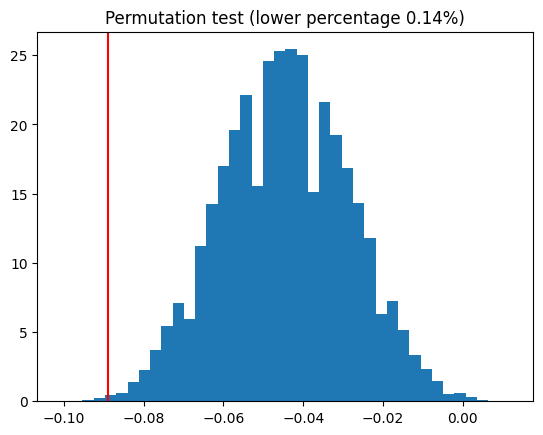

In [7]:
plt.hist(samples, density=True, bins=40)
plt.axvline(x=diff, color="red")
plt.title(f"Permutation test (lower percentage {100*np.mean(samples <= diff):.2f}%)")
#plt.savefig("Perm_test.pdf", bbox_inches="tight")
plt.show()

## <a name="bootstrapping"/>Bootstrapping

### Hàm phân phối thực nghiệm

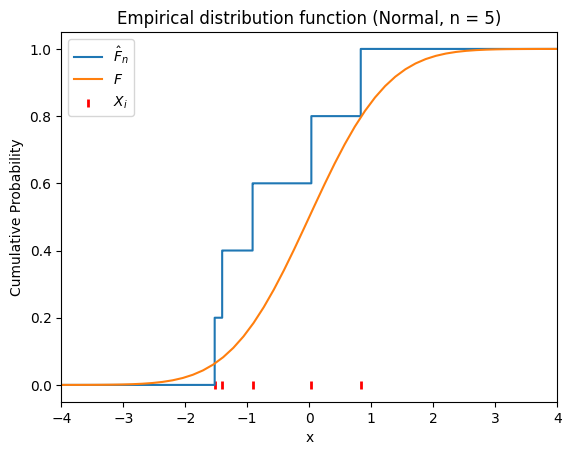

In [8]:
n = 5
x = np.random.normal(size=n)
t = np.linspace(-4, 4)
tx = np.sort(np.hstack((t, x, x - 0.0001)))

F = stats.norm().cdf(t)
Fn = np.mean(np.expand_dims(x, 0) <= np.expand_dims(tx, 1), axis=1)

plt.plot(tx, Fn, label="$\hat{F}_n$")
plt.plot(t, F, label="$F$")
plt.scatter(x, np.zeros(len(x)), marker="|", linewidths=2, color="red", label="$X_i$")
plt.xlim(-4, 4)
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.title(f"Empirical distribution function (Normal, n = {n})")
plt.legend()
#plt.savefig("eCDFn5.pdf", bbox_inches="tight")
plt.show()

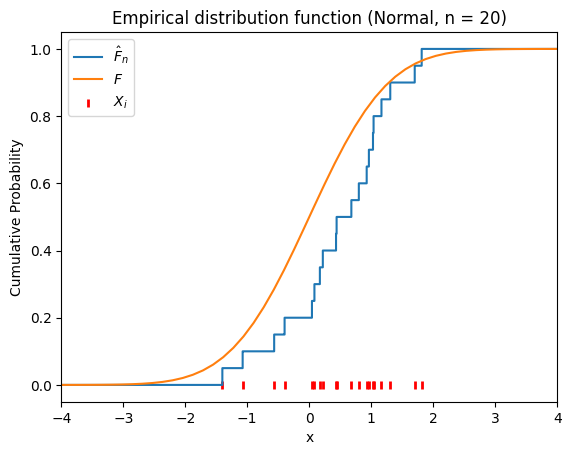

In [9]:
n = 20
x = np.random.normal(size=n)
t = np.linspace(-4, 4)
tx = np.sort(np.hstack((t, x, x - 0.0001)))

F = stats.norm().cdf(t)
Fn = np.mean(np.expand_dims(x, 0) <= np.expand_dims(tx, 1), axis=1)

plt.plot(tx, Fn, label="$\hat{F}_n$")
plt.plot(t, F, label="$F$")
plt.scatter(x, np.zeros(len(x)), marker="|", linewidths=2, color="red", label="$X_i$")
plt.xlim(-4, 4)
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.title(f"Empirical distribution function (Normal, n = {n})")
plt.legend()
#plt.savefig("eCDFn20.pdf", bbox_inches="tight")
plt.show()

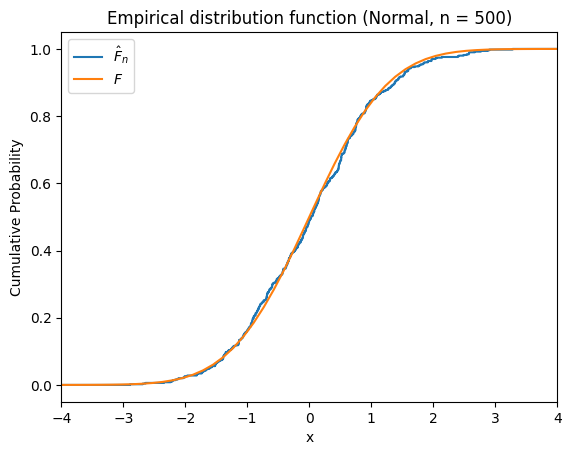

In [10]:
n = 500
x = np.random.normal(size=n)
t = np.linspace(-4, 4)
tx = np.sort(np.hstack((t, x, x - 0.0001)))

F = stats.norm().cdf(t)
Fn = np.mean(np.expand_dims(x, 0) <= np.expand_dims(tx, 1), axis=1)

plt.plot(tx, Fn, label="$\hat{F}_n$")
plt.plot(t, F, label="$F$")
plt.xlim(-4, 4)
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.title(f"Empirical distribution function (Normal, n = {n})")
plt.legend()
#plt.savefig("eCDFn500.pdf", bbox_inches="tight")
plt.show()

### Ví dụ 1

In [11]:
x = np.array([
    1.56, 1.47, 1.59, 1.65, 1.62, 1.78, 1.69, 1.49, 1.92, 1.55,
    1.65, 1.52, 1.65, 1.60, 1.71, 1.48, 1.69, 1.65, 1.59, 1.74])
n = len(x)

Thống kê trung bình chiều dài trong mẫu $\bar{x}$

In [12]:
x_bar = np.mean(x)
print(x_bar)

1.6300000000000001


Bootstrap $N = 10000$ lần từ mẫu dữ liệu

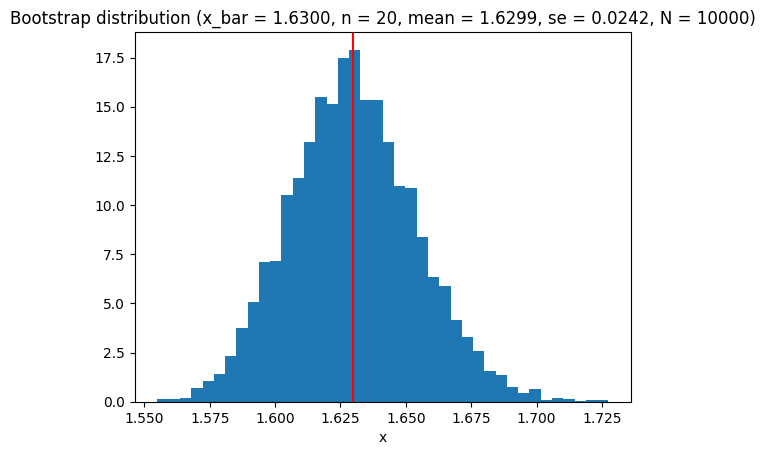

In [13]:
N = 10000
boot_dist = [np.mean(np.random.choice(x, size=n, replace=True)) for _ in range(N)]
plt.hist(boot_dist, bins=40, density=True)
plt.axvline(x=np.mean(boot_dist), color="red")
plt.xlabel("x")
plt.title(f"Bootstrap distribution (x_bar = {x_bar:.4f}, n = {n}, " 
          f"mean = {np.mean(boot_dist):.4f}, se = {np.std(boot_dist):.4f}, N = {N})")
#plt.savefig("bootstrap_dist_mu.pdf", bbox_inches="tight")
plt.show()

Xây dựng khoảng tin cậy $\gamma = 95\%$ bằng bootstrap

In [14]:
gamma = 0.95
anpha = 1 - gamma
print(np.quantile(boot_dist, [anpha/2, 1 - anpha/2]))

[1.585 1.679]


Xây dựng khoảng tin cậy $\gamma = 95\%$ bằng công thức
$$
\bar{x} \pm t_{1 - \alpha/2}^{df}\frac{s}{\sqrt{n}}
$$

In [15]:
se = np.std(x)/(n**0.5)
z = stats.norm.ppf(1 - anpha/2)
t = stats.t.ppf(1 - anpha/2, df=n-1)
print(se)
print([x_bar - z*se, x_bar + z*se])
print([x_bar - t*se, x_bar + t*se])

0.023937418407171642
[1.5830835220390775, 1.6769164779609227]
[1.5798984074733546, 1.6801015925266456]


### Ví dụ 2

In [16]:
x = np.array([13, 16, 19, 21, 24, 27, 30, 33, 36, 39])
y = np.array([5.0768, 21.1897, 17.1548, 22.8325, 26.5348, 31.4085, 26.8648, 29.3894, 37.4476, 44.292])

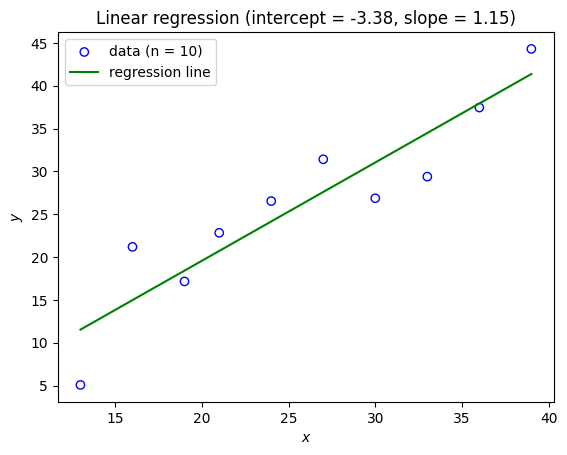

In [17]:
t = np.linspace(np.min(x), np.max(x), 100)

lin_model = stats.linregress(x, y)
y_reg = lin_model.intercept + lin_model.slope*t

plt.scatter(x, y, facecolors="none", edgecolors="blue", label=f"data (n = {len(x)})")
plt.plot(t, y_reg, color="green", label="regression line")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.title(f"Linear regression (intercept = {lin_model.intercept:.2f}, slope = {lin_model.slope:.2f})")
#plt.savefig("Bootstrap_scatter.pdf", bbox_inches="tight")
plt.show()

In [18]:
def linregress_bootstrap(x, y, N):
    intercept, slope  = [], []
    for _ in range(N):
        index = np.random.choice(np.arange(len(x)), size=len(x), replace=True)
        x_boots, y_boots = x[index], y[index]
        lin_model = stats.linregress(x_boots, y_boots)
        intercept.append(lin_model.intercept)
        slope.append(lin_model.slope)
    return {"intercept": np.array(intercept), "slope": np.array(slope)}

N = 1000
boots_dist = linregress_bootstrap(x, y, N)
print(np.round(np.mean(boots_dist["slope"]), 2))
print(np.round(np.quantile(boots_dist["slope"], [0.025, 0.975]), 2))

1.12
[0.7  1.44]


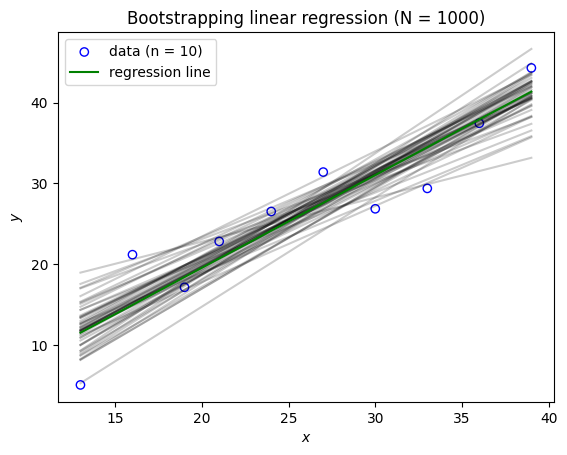

In [19]:
for i in np.random.randint(0, N, size=50):
    plt.plot(t, boots_dist["intercept"][i] + boots_dist["slope"][i]*t, color="black", alpha=0.2)
    
plt.scatter(x, y, facecolors="none", edgecolors="blue", label=f"data (n = {len(x)})")
plt.plot(t, y_reg, color="green", label="regression line")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.title(f"Bootstrapping linear regression (N = {N})")
#plt.savefig("Bootstrap_scatter_samp.pdf", bbox_inches="tight")
plt.show()

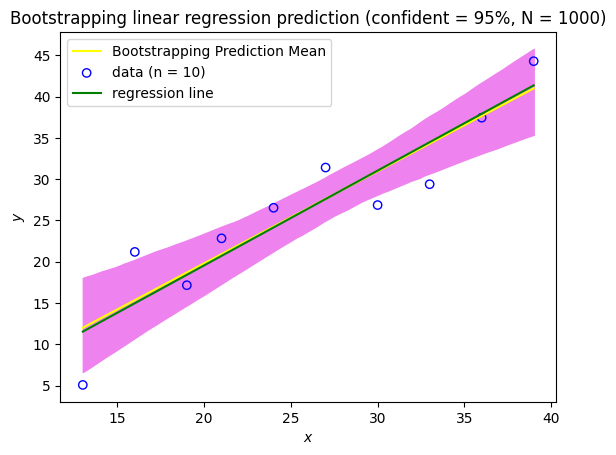

In [20]:
y_pred = boots_dist["intercept"] + boots_dist["slope"]*t.reshape((-1,1))
anpha = 0.05
lower_pred = np.quantile(y_pred, anpha/2, axis=1)
upper_pred = np.quantile(y_pred, 1 - anpha/2, axis=1)
mean_pred = np.mean(y_pred, axis=1)

plt.fill_between(t, lower_pred, upper_pred, color="violet")
plt.plot(t, mean_pred, color="yellow", label="Bootstrapping Prediction Mean")
plt.scatter(x, y, facecolors="none", edgecolors="blue", label=f"data (n = {len(x)})")
plt.plot(t, y_reg, color="green", label="regression line")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.title(f"Bootstrapping linear regression prediction (confident = {(1-anpha)*100:.0f}%, N = {N})")
#plt.savefig("Bootstrap_scatter_conf.pdf", bbox_inches="tight")
plt.show()

## <a name="kiem_tra_cheo"/>Kiểm tra chéo

### Ví dụ

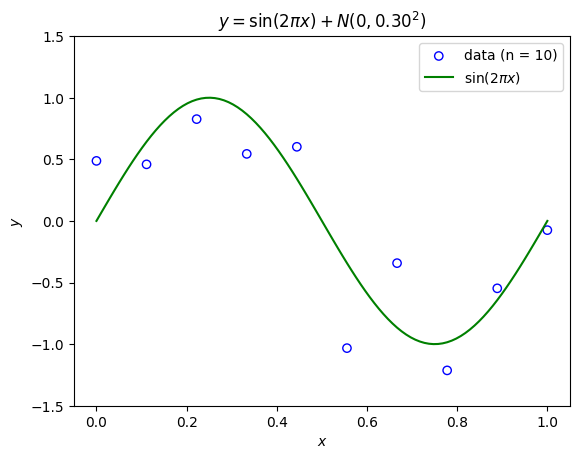

In [21]:
np.random.seed(1)

n = 10
sigma = 0.3
x = np.linspace(0, 1, n)
y = np.sin(2*np.pi*x) + np.random.normal(0, sigma, size=n)
t = np.linspace(0, 1, 100)

plt.scatter(x, y, facecolors="none", edgecolors="blue", label=f"data (n = {n})")
plt.plot(t, np.sin(2*np.pi*t), color="green", label="$\sin(2\pi x)$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.title(f"$y = \sin(2\pi x) + N(0, {sigma:.2f}^2)$")
#plt.savefig("Cross_val_scatter.pdf", bbox_inches="tight")
plt.show()

In [22]:
def get_X_matrix(x, d):
    X = [[xi**j for j in range(d + 1)] for xi in x]
    return np.array(X)

def y_hat(w_hat, x):
    X = get_X_matrix(x, len(w_hat) - 1)
    return X @ w_hat

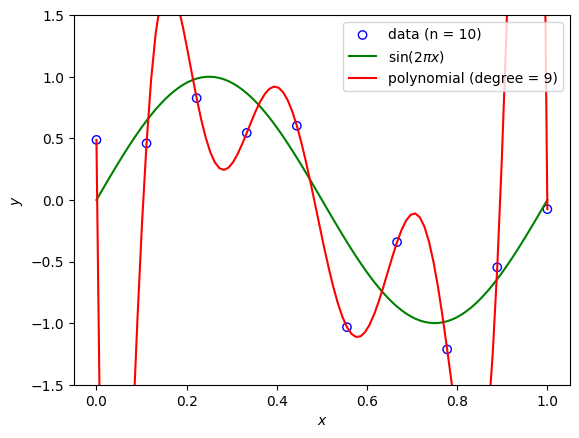

In [23]:
d = n - 1
w_hat = np.linalg.pinv(get_X_matrix(x, d)) @ y

plt.scatter(x, y, facecolors="none", edgecolors="blue", label=f"data (n = {n})")
plt.plot(t, np.sin(2*np.pi*t), color="green", label="$\sin(2\pi x)$")
plt.plot(t, y_hat(w_hat, t), color="red", label=f"polynomial (degree = {d})")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

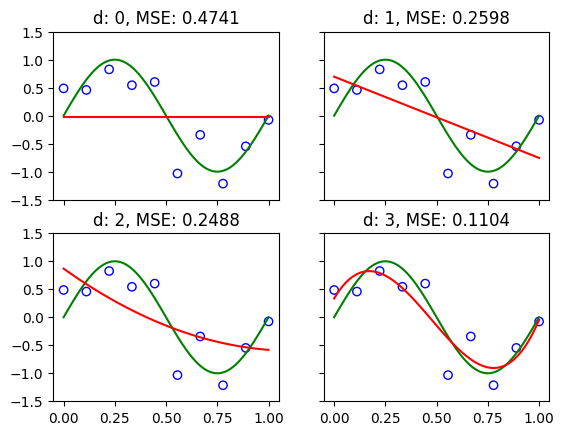

In [24]:
fig, _ = plt.subplots(2, 2, sharex=True, sharey=True)
allaxes = fig.get_axes()

for d, axs in zip([0, 1, 2, 3], allaxes):
    w_hat = np.linalg.pinv(get_X_matrix(x, d)) @ y
    MSE = np.sum((y - y_hat(w_hat, x))**2)/len(y)

    axs.scatter(x, y, facecolors="none", edgecolors="blue")
    axs.plot(t, np.sin(2*np.pi*t), color="green")
    axs.plot(t, y_hat(w_hat, t), color="red")
    axs.set_ylim(-1.5, 1.5)
    axs.set_title(f"d: {d}, MSE: {MSE:.4f}")
#plt.savefig("Cross_val_MSE1.pdf", bbox_inches="tight")
plt.show()

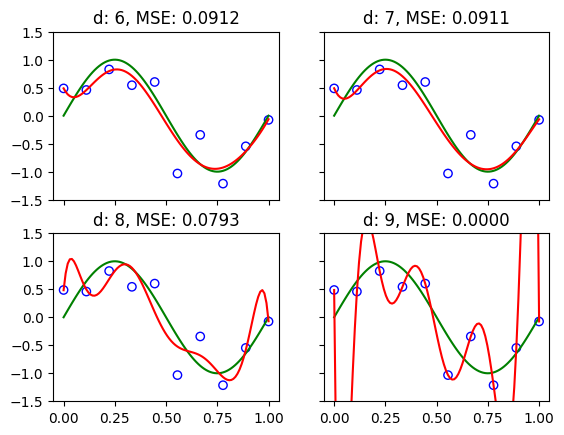

In [25]:
fig, _ = plt.subplots(2, 2, sharex=True, sharey=True)
allaxes = fig.get_axes()

for d, axs in zip([n - i for i in [4, 3, 2, 1]], allaxes):
    w_hat = np.linalg.pinv(get_X_matrix(x, d)) @ y
    MSE = np.sum((y - y_hat(w_hat, x))**2)/len(y)

    axs.scatter(x, y, facecolors="none", edgecolors="blue")
    axs.plot(t, np.sin(2*np.pi*t), color="green")
    axs.plot(t, y_hat(w_hat, t), color="red")
    axs.set_ylim(-1.5, 1.5)
    axs.set_title(f"d: {d}, MSE: {MSE:.4f}")
#plt.savefig("Cross_val_MSE2.pdf", bbox_inches="tight")
plt.show()

In [26]:
def LOOCV(x, y, d_list):
    n = len(x)
    index = np.arange(n)
    MSE_trains, MSE_tests = [], []
    for d in d_list:
        MSE_train, MSE_test = [], []
        for i in range(n):
            x_train, x_test = x[index != i], x[index == i]
            y_train, y_test = y[index != i], y[index == i]
            w_hat = np.linalg.pinv(get_X_matrix(x_train, d)) @ y_train
            MSE_train.append(np.sum((y_train - y_hat(w_hat, x_train))**2)/len(y_train))
            MSE_test.append(np.sum((y_test - y_hat(w_hat, x_test))**2)/len(y_test))
        MSE_trains.append(sum(MSE_train)/len(MSE_train))
        MSE_tests.append(sum(MSE_test)/len(MSE_test))
    return np.array(MSE_trains), np.array(MSE_tests)

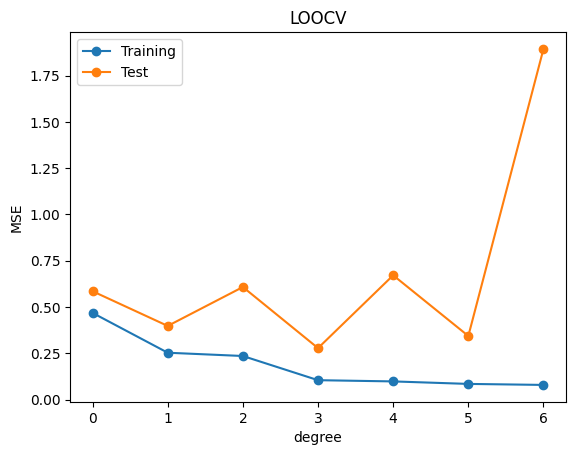

In [27]:
d_list = range(7)
MSE_trains, MSE_tests = LOOCV(x, y, d_list)

plt.plot(d_list, MSE_trains, "-o", label="Training")
plt.plot(d_list, MSE_tests, "o-", label="Test")
plt.xlabel("degree")
plt.ylabel("MSE")
plt.title("LOOCV")
plt.legend()
#plt.savefig("Cross_val_train_test.pdf", bbox_inches="tight")
plt.show()

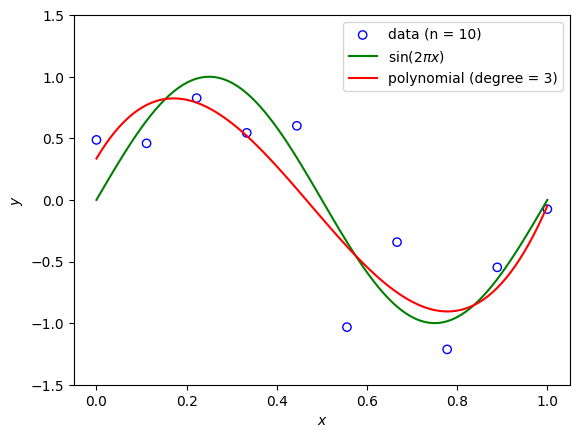

In [28]:
d_opt = d_list[np.argmin(MSE_tests)]
w_hat = np.linalg.pinv(get_X_matrix(x, d_opt)) @ y

plt.scatter(x, y, facecolors="none", edgecolors="blue", label=f"data (n = {n})")
plt.plot(t, np.sin(2*np.pi*t), color="green", label="$\sin(2\pi x)$")
plt.plot(t, y_hat(w_hat, t), color="red", label=f"polynomial (degree = {d_opt})")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.ylim(-1.5, 1.5)
plt.legend()
#plt.savefig("Cross_val_d_opt.pdf", bbox_inches="tight")
plt.show()